In [34]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
!pip install scikit-learn

In [4]:
salary_traindata=pd.read_csv("/content/SalaryData_Train.csv.crdownload")
salary_traindata

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13209,46,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,Guatemala,<=50K
13210,47,Private,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,7298.0,0.0,40.0,United-States,>50K
13211,65,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
13212,23,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


## Exploratory Data Analysis

In [5]:
salary_traindata.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [6]:
salary_traindata.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,13214.000000,13214.000000,13213.000000,13213.000000,13213.000000
mean,38.413425,10.123127,1077.836525,89.195716,40.971392
std,13.124599,2.527959,7397.524438,404.043286,11.866012
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [7]:
salary_traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13214 entries, 0 to 13213
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            13214 non-null  int64  
 1   workclass      13214 non-null  object 
 2   education      13214 non-null  object 
 3   educationno    13214 non-null  int64  
 4   maritalstatus  13214 non-null  object 
 5   occupation     13214 non-null  object 
 6   relationship   13213 non-null  object 
 7   race           13213 non-null  object 
 8   sex            13213 non-null  object 
 9   capitalgain    13213 non-null  float64
 10  capitalloss    13213 non-null  float64
 11  hoursperweek   13213 non-null  float64
 12  native         13213 non-null  object 
 13  Salary         13213 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.4+ MB


In [8]:
sal_train_cat_col=['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']
for i in sal_train_cat_col:
    print(salary_traindata[i].value_counts())

 Private             9753
 Self-emp-not-inc    1107
 Local-gov            892
 State-gov            582
 Self-emp-inc         473
 Federal-gov          405
 Without-pay            2
Name: workclass, dtype: int64
 HS-grad         4360
 Some-college    2969
 Bachelors       2220
 Masters          718
 Assoc-voc        545
 11th             451
 Assoc-acdm       425
 10th             365
 7th-8th          245
 Prof-school      228
 9th              188
 Doctorate        155
 12th             145
 5th-6th          119
 1st-4th           65
 Preschool         16
Name: education, dtype: int64
 Married-civ-spouse       6170
 Never-married            4242
 Divorced                 1869
 Separated                 417
 Widowed                   346
 Married-spouse-absent     160
 Married-AF-spouse          10
Name: maritalstatus, dtype: int64
 Prof-specialty       1758
 Craft-repair         1736
 Exec-managerial      1708
 Adm-clerical         1705
 Sales                1616
 Other-service      

In [9]:
#salarytraindata=salary_traindata
#for col in sal_train_cat_col:
salary_traindata=pd.get_dummies(salary_traindata,columns=sal_train_cat_col)

salary_traindata

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary_ <=50K,Salary_ >50K
0,39,13,2174.0,0.0,40.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,13,0.0,0.0,13.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,38,9,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,7,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,13,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13209,46,5,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
13210,47,7,7298.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
13211,65,13,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
13212,23,9,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [10]:
salary_traindata.columns

Index(['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek',
       'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       ...
       'native_ Scotland', 'native_ South', 'native_ Taiwan',
       'native_ Thailand', 'native_ Trinadad&Tobago', 'native_ United-States',
       'native_ Vietnam', 'native_ Yugoslavia', 'Salary_ <=50K',
       'Salary_ >50K'],
      dtype='object', length=105)

In [11]:
salary_traindata=salary_traindata.drop(columns='Salary_ <=50K',axis=1)
salary_traindata

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary_ >50K
0,39,13,2174.0,0.0,40.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0.0,0.0,13.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13209,46,5,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13210,47,7,7298.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
13211,65,13,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
13212,23,9,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
salary_traindata.shape

(13214, 104)

# EDA on test Data

In [13]:
salary_testdata=pd.read_csv('/content/SalaryData_Test.csv.crdownload')
salary_testdata

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12910,21,Private,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,64,United-States,<=50K
12911,55,Self-emp-inc,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,10,United-States,<=50K
12912,33,Private,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,60,United-States,<=50K
12913,35,Private,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K


In [14]:
salary_testdata.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [15]:
salary_testdata.shape

(12915, 14)

In [16]:
salary_testdata.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,12915.000000,12915.000000,12915.000000,12915.000000,12915.000000
mean,38.776849,10.113511,1135.679597,89.787147,40.928610
std,13.380937,2.562515,7827.290637,408.128325,12.090965
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [17]:
dtypes=salary_testdata.dtypes
dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [18]:
##Extract Categorical columns
cat_col=salary_testdata.select_dtypes(include='object').columns
cat_col

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [19]:
salary_testdata=pd.get_dummies(salary_testdata,columns=cat_col)
salary_testdata

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary_ <=50K,Salary_ >50K
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12910,21,9,0,0,64,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
12911,55,9,0,0,10,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
12912,33,9,0,0,60,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
12913,35,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [20]:
salary_testdata=salary_testdata.drop(columns='Salary_ <=50K',axis=1)
salary_testdata

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary_ >50K
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12910,21,9,0,0,64,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
12911,55,9,0,0,10,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
12912,33,9,0,0,60,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
12913,35,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


# Split data for training into x and y

In [29]:
x_train=salary_traindata.iloc[:,:102]
y_train=salary_traindata.iloc[:,102]
x_test=salary_testdata.iloc[:,:102]
y_test=salary_testdata.iloc[:,102]
print(x_train)
print(y_train)


       age  educationno  capitalgain  capitalloss  hoursperweek  \
0       39           13       2174.0          0.0          40.0   
1       50           13          0.0          0.0          13.0   
2       38            9          0.0          0.0          40.0   
3       53            7          0.0          0.0          40.0   
4       28           13          0.0          0.0          40.0   
...    ...          ...          ...          ...           ...   
13209   46            5          0.0          0.0          40.0   
13210   47            7       7298.0          0.0          40.0   
13211   65           13          0.0          0.0          40.0   
13212   23            9          0.0          0.0          40.0   
13213   28           10          NaN          NaN           NaN   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                           0                     0                   0   
1                           0                

In [63]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
x_train = imputer.fit_transform(x_train)
print(y_train.shape)
y_train = y_train.reshape(-1, 1)
y_train = imputer.fit_transform(y_train)

clf.fit(x_train,y_train)

(13214, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [64]:
gau_accuracy=clf.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


### Use Gaussian Naive Bayes model for numerial classification

In [40]:
y_pred=clf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [41]:
report=classification_report(y_test,y_pred)

In [42]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     12909
           1       0.00      0.17      0.00         6

    accuracy                           0.96     12915
   macro avg       0.50      0.56      0.49     12915
weighted avg       1.00      0.96      0.98     12915



In [43]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[12377,   532],
       [    5,     1]])

Text(50.722222222222214, 0.5, 'Actual Values')

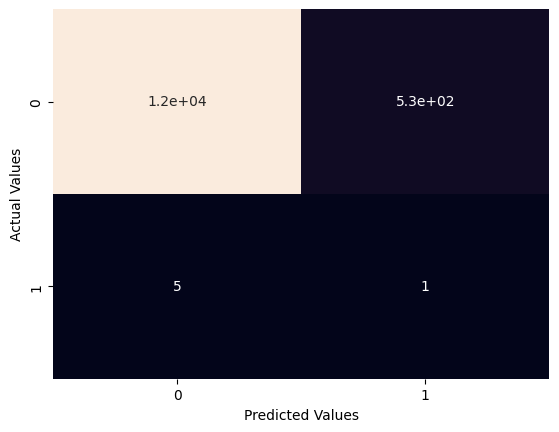

In [65]:
import matplotlib.pyplot as plt
sns.heatmap(matrix,annot=True,cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

### Use Categorical Naive Bayes Model

In [46]:
cat_model=CategoricalNB()
model=cat_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
cat_accuracy=model.score(x_test,y_test)
cat_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but CategoricalNB was fitted without feature names
  warnings.warn(


0.9995354239256679

In [48]:
y_pred=model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but CategoricalNB was fitted without feature names
  warnings.warn(


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88     11360
           1       0.63      0.74      0.68      3700

    accuracy                           0.83     15060
   macro avg       0.77      0.80      0.78     15060
weighted avg       0.84      0.83      0.83     15060



In [49]:
from sklearn.metrics import confusion_matrix
matrix_cat=confusion_matrix(y_test,y_pred)
matrix_cat

array([[12909,     0],
       [    6,     0]])

Text(50.722222222222214, 0.5, 'Actual Values')

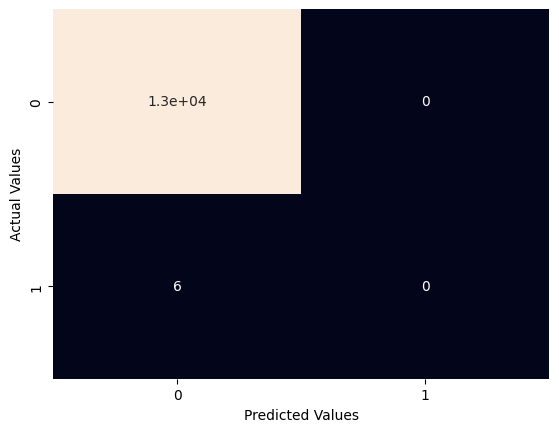

In [51]:
import matplotlib.pyplot as plt
sns.heatmap(matrix_cat,annot=True,cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

### Use Multinomial naive Bayes model

In [52]:
mul_model=MultinomialNB()
mul_model=mul_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
mul_model_accuracy=mul_model.score(x_test,y_test)
mul_model_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


0.04816105303910182

In [54]:
y_pred=mul_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.05      0.09     12909
           1       0.00      1.00      0.00         6

    accuracy                           0.05     12915
   macro avg       0.50      0.52      0.05     12915
weighted avg       1.00      0.05      0.09     12915



In [56]:
from sklearn.metrics import confusion_matrix
matrix_mul=confusion_matrix(y_test,y_pred)
matrix_mul

array([[  616, 12293],
       [    0,     6]])

Text(50.722222222222214, 0.5, 'Actual Values')

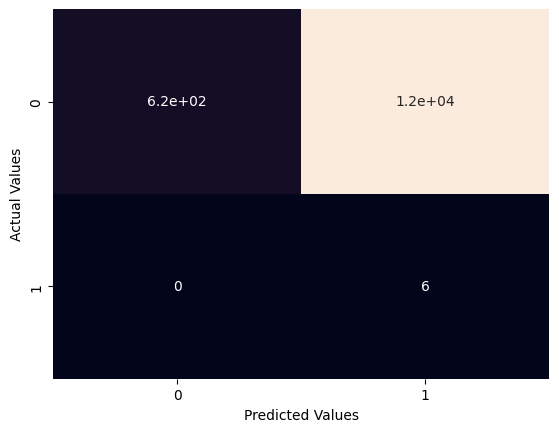

In [57]:
import matplotlib.pyplot as plt
sns.heatmap(matrix_mul,annot=True,cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

### Table for different model accuracies

In [58]:
accuracy_table=pd.DataFrame({'Model':['Gaussian','Categorical','Multinomial'],
                            'Accuracy':[gau_accuracy,cat_accuracy,mul_model_accuracy]})
accuracy_table

,Model,Accuracy
0,Gaussian,0.958420
1,Categorical,0.999535
2,Multinomial,0.048161
